# Loading the libraries

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk as nk
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS, CountVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
import re

In [379]:
import os
os.getcwd()
os.chdir("/Users/pratham/Downloads/Text Classification - HealthCare")
df = pd.read_csv("TextClassification_Data.csv")

In [225]:
np.shape(df)

In [390]:
df.head(n=6)

,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
0,2015561331001,Pt aware that he needs ROV for refill,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,No,2015_5_6133_1001
1,2015561341001,Mom wants to know if the Focalin needs some do...,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6134_1001
2,2015561351001,pt called to discuss nortryptiline. she says s...,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6135_1001
3,2015561361001,FYI Nortryptline medication.,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,MISCELLANEOUS,OTHERS,No,2015_5_6136_1001
4,2015561371001,Letter of patient establishment request,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6137_1001
5,2015561401001,Appt question,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,APPOINTMENTS,QUERY ON CURRENT APPOINTMENT,No,2015_5_6140_1001


In [223]:
df.tail(n=6)

In [336]:
from nltk import FreqDist

freq_summary = FreqDist(df.iloc[:,1])

# show most 10 frequent word in the summary
print freq_summary.most_common(10)

[(nan, 3347), ('Phone Note', 3143), ('SCHEDULED', 376), ('scheduled', 238), ('rx refill', 201), ('pt would like a cb', 156), ('running late', 153), ('MRI results', 124), ('ESI', 111), ('Rx refill request', 103)]


In [337]:
#Remove Punctuation Marks
import string

def removePunctuation(a):
    a = a.translate(None, string.punctuation)
    return a

In [338]:
#Remove Numbers
def removeDigits(a):
    a = ''.join([i for i in a if not i.isdigit()])
    return a

In [339]:
#Case folding
def caseFold(a):
    a = a.lower()
    return a

In [340]:
#Tokenization
from nltk.tokenize import word_tokenize

def tokenize(a):
    a = word_tokenize(a)
    return a

In [341]:
#Stopwords Removal
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def removeStopwords(word_tokens):
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    word_tokens = filtered_sentence
    return word_tokens

In [342]:
#Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english") #SnowballStemmer("english", ignore_stopwords=True)

def stemWord(a):
    l = []
    for w in a:
        l.append(stemmer.stem(w))
    a = l
    return a

In [343]:
#Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

def lemmatizer(a):
    l = []
    for w in a:
        l.append(lmtzr.lemmatize(w))
    a = l
    return a

In [344]:
#Remove Whitespace
import string
def stripWhiteSpaces(a):
    l = []
    for w in a:
        l.append(w.replace("  "," "))
    a = l
    return a


In [351]:
#Convert tokens back to sentence
import nltk
import string

def detokenizer(a):
    a = "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in a]).strip()
    return a

'This is such a happy picture'

In [357]:
#Remove Unnecessary occurence of "u"
import string
def removeU(a):
    l = []
    for w in a:
        l.append(w.replace("u",""))
    a = l
    return a

# Pre-processing

In [375]:
corpus = df
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: removePunctuation(str(a)))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: removeDigits(str(a)))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: caseFold(str(a)))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: tokenize(str(a)))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: removeStopwords(a))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: stemWord(a))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: lemmatizer(a))
corpus["SUMMARY"] = corpus["SUMMARY"].map(lambda a: detokenizer(a))

In [376]:
corpus["SUMMARY"].head(n=6)

0                      pt awar need rov refil
1     mom want know focalin need dosag adjust
2    pt call discus nortryptilin say weird ta
3                       fyi nortryptlin medic
4            letter patient establish request
5                               appt question
Name: SUMMARY, dtype: object

In [377]:
corpus["SUMMARY"].tail(n=6)

57274                pt wife would like cb
57275                         med lost rxs
57276           pt mom call report migrain
57277                      dental clearanc
57278                      cathet document
57279    status fmla form await md complet
Name: SUMMARY, dtype: object

In [381]:
df["SUMMARY"].head(n=6)

0                Pt aware that he needs ROV for refill
1    Mom wants to know if the Focalin needs some do...
2    pt called to discuss nortryptiline. she says s...
3                         FYI Nortryptline medication.
4              Letter of patient establishment request
5                                        Appt question
Name: SUMMARY, dtype: object

# Comparision

Comparsion between the raw "SUMMARY" column and after pre-processing steps have been applied.

In [385]:
comparison = pd.DataFrame({'Before':df["SUMMARY"],'After': corpus["SUMMARY"]})
comparison.head(n=5)

,After,Before
0,pt awar need rov refil,Pt aware that he needs ROV for refill
1,mom want know focalin need dosag adjust,Mom wants to know if the Focalin needs some do...
2,pt call discus nortryptilin say weird ta,pt called to discuss nortryptiline. she says s...
3,fyi nortryptlin medic,FYI Nortryptline medication.
4,letter patient establish request,Letter of patient establishment request


# TF-IDF

In [426]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(corpus) 

In [427]:
tfidf_transformer = TfidfTransformer()
df_tfidf = tfidf_transformer.fit_transform(df_counts)

# Missing Value Analysis and Imputation

In [416]:
#Missing values
corpus.isnull().values.ravel().sum()

0

In [389]:
#Missing value by category
corpus.isnull().sum()

fileid                     0
SUMMARY                 3347
DATA                       0
categories                 0
sub_categories             0
previous_appointment       2
ID                         0
dtype: int64

In [408]:
#Missing Value Imputation
#from sklearn.preprocessing import Imputer
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
corpus = DataFrameImputer().fit_transform(corpus)



In [413]:
#No missing values
corpus.isnull().sum()

fileid                  0
SUMMARY                 0
DATA                    0
categories              0
sub_categories          0
previous_appointment    0
ID                      0
dtype: int64

In [410]:
corpus.head(n=6)

,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
0,2015561331001,pt awar need rov refil,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,No,2015_5_6133_1001
1,2015561341001,mom want know focalin need dosag adjust,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6134_1001
2,2015561351001,pt call discus nortryptilin say weird ta,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6135_1001
3,2015561361001,fyi nortryptlin medic,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,MISCELLANEOUS,OTHERS,No,2015_5_6136_1001
4,2015561371001,letter patient establish request,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6137_1001
5,2015561401001,appt question,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,APPOINTMENTS,QUERY ON CURRENT APPOINTMENT,No,2015_5_6140_1001


# WordCloud

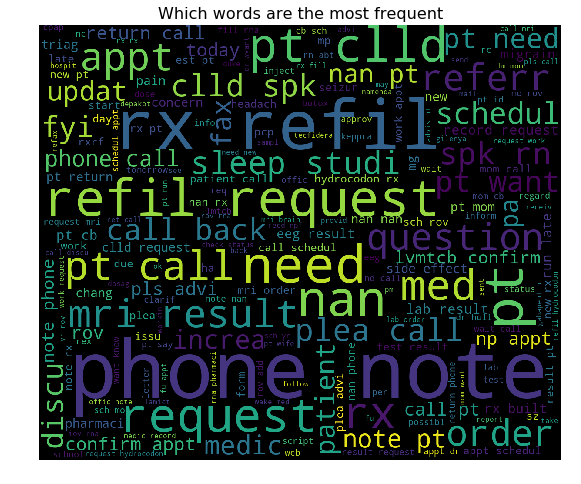

In [431]:
plt.figure(figsize = (12,8))
SUMMARY_cloud = ' '.join(corpus.iloc[:,1])
wc = WordCloud(background_color = 'black', width = 1200, height = 1000).generate(SUMMARY_cloud)
plt.imshow(wc)
plt.axis('off')
plt.title('Which words are the most frequent', fontsize = 16)
plt.show()
del (SUMMARY_cloud, wc)

In [ ]:
Distribution of number of words present in text

In [452]:
def word_count(text):
    return len(text.split())
SUMMARY_count = np.vectorize(word_count)(corpus.iloc[:,1])

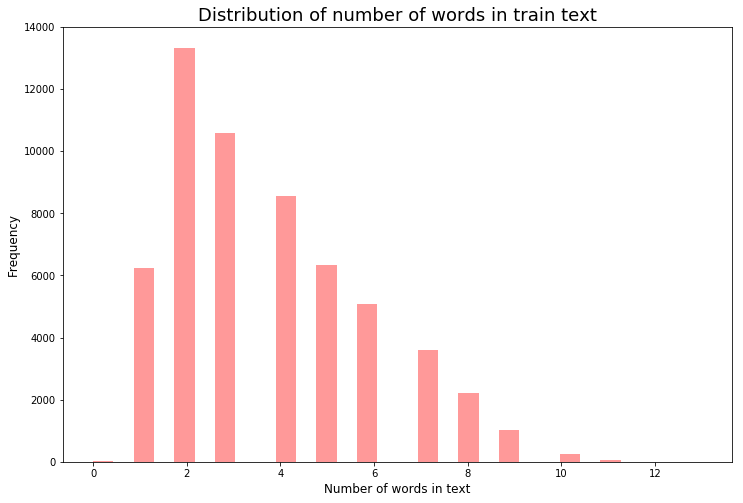

In [446]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.distplot(SUMMARY_count, bins=30, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Distribution of number of words in train text", fontsize=18)
plt.show()
del SUMMARY_count